# K-Fold Validation

In [ ]:
""" 
Full dataset

Regular Splitting
---------------------------------------------------------
|      70%                     |    15%     |    15%     |
---------------------------------------------------------

Cross Validation
5-folds
-----------------------------------------------------------------------
|             |             |             |             |             |
-----------------------------------------------------------------------

"""

In [57]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
                                StratifiedKFold,
                                cross_validate
                            )
from sklearn.metrics import (
                                confusion_matrix,
                                f1_score,
                                precision_score,
                                recall_score,
                                accuracy_score
                            )
warnings.filterwarnings('ignore')

### Load the Data


In [5]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']


### Configure K-Fold CV

In [ ]:
cv = StratifiedKFold( # How Cross Validation should done
                        n_splits=5, # Number of Folds
                        random_state=42,
                        shuffle=True
                    )

In [7]:
model_lr = LogisticRegression(
                                random_state=42,
                                max_iter=1000
                            )

model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
cv_results = cross_validate( # Performing Cross validations
                                model_lr,
                                X_train,
                                Y_train,
                                cv=cv,
                                scoring='precision',
                                return_train_score=False,
                            )

In [ ]:
cv_results

{'fit_time': array([0.00608993, 0.00463414, 0.00409865, 0.00345707, 0.00349092,
        0.00347996]),
 'score_time': array([0.00170302, 0.00098014, 0.00083208, 0.00085688, 0.00079179,
        0.00075984]),
 'test_score': array([0.71624088, 0.73247779, 0.70943396, 0.69150943, 0.74181118,
        0.71687321])}

In [34]:
score_arr = ['accuracy', 'precision', 'recall', 'f1']
for score in score_arr:
    cv_results = cross_validate(
                                model_lr,
                                X_train,
                                Y_train,
                                cv=cv,
                                scoring=score,
                                return_train_score=False,
                            )
    test_score = cv_results['test_score']
    test_score_avg = np.mean(test_score)
    print(f"Average {score} : {test_score_avg}")

Average accuracy : 0.7164898412269761
Average precision : 0.7180577414676202
Average recall : 0.7133457753547016
Average f1 : 0.7155921387324043


In [49]:
cv_results = cross_validate(
                                model_lr,
                                X_train,
                                Y_train,
                                cv=cv,
                                scoring='precision',
                                return_train_score=True,
                            )

## Splitting Data for best Fold
- best_index = np.argmax(cv_results['test_score']) - This line finds the index of the fold that had the highest test score. 
- fold_indices = list(cv.split(X_train, Y_train)) - generates the actual indices for all the train/test splits that cv would create. The cv.split() method is a generator that yields the indices for the training and testing sets for each fold. We convert this generator into a list to access the splits by their index.
- best_train_idx, best_test_idx = fold_indices[best_index] -  This line extracts the training and testing indices for the best-performing fold. It uses the best_index calculated in the first step to select the corresponding tuple from fold_indices.

In [50]:
best_index = np.argmax(cv_results['test_score'])
fold_indices = list(cv.split(X_train, Y_train))
best_train_idx, best_test_idx = fold_indices[best_index]

X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

In [51]:
model_lr = LogisticRegression(
                                random_state=42,
                                max_iter=1000
                            )

model_lr.fit(X_train_best, Y_train_best)

LogisticRegression(max_iter=1000, random_state=42)

In [53]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

In [59]:
accuaracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

In [60]:
print(f"Accuarcy: {accuaracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1 Score: {f1_score}")

Accuarcy: 0.7155
Precision: 0.37283236994219654
Recall: 0.6564885496183206
f1 Score: 0.47557603686635946


Text(50.722222222222214, 0.5, 'Actual')

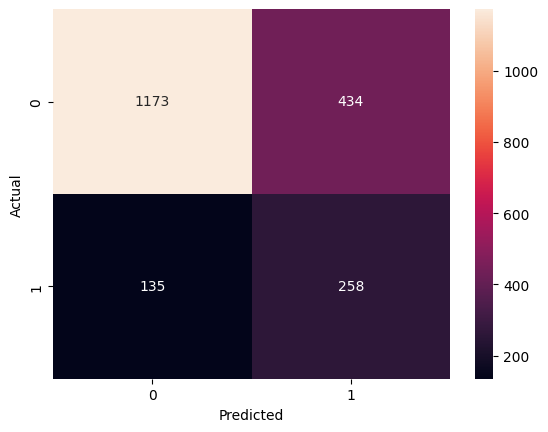

In [61]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")